# Loading and Inspecting Climate Data

This notebook explores historic temperatures for the United States, broken down by month and year, from 1895-2020.

The dataset is available here: [Historical Climate Data](https://www.ncdc.noaa.gov/cag/national/time-series/110/tavg/all/1/1895-2020?base_prd=true&begbaseyear=1901&endbaseyear=2000)

In [108]:
# Load desired packages

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# change default figsize
plt.rcParams['figure.figsize'] = (15, 12)

In [177]:
# Load raw temp data
atRaw = pd.read_csv('../rawData/tavg-1895-2020.csv')

In [178]:
# Inspect raw temp data
atRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1501 non-null   int64  
 1   Value    1501 non-null   float64
 2   Anomaly  1501 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 35.3 KB


In [179]:
# Let's take a look at the temp data table
atRaw.head()

,Date,Value,Anomaly
0,189501,26.69,-3.43
1,189502,26.60,-7.22
2,189503,39.97,-1.53
3,189504,52.90,1.85
4,189505,59.94,-0.26


## Data Cleaning

Since the Date series has the Year and Month concatenated. I would like to separate the two and create a new series for each.

In [206]:
# Inspect data types

atRaw.dtypes

Date         int64
Value      float64
Anomaly    float64
Year         int64
Month        int64
dtype: object

In [207]:
# Convert Date series to string in order to separate Year and Month

strDate = atRaw.Date.astype(str)

strDate

0       189501
1       189502
2       189503
3       189504
4       189505
         ...  
1496    201909
1497    201910
1498    201911
1499    201912
1500    202001
Name: Date, Length: 1501, dtype: object

In [208]:
# Write a loop to separate each year and month from the Date series

# Create empty arrays to hold the years and months once separated
month = []
year = []

# Loop through the Date series, pull out the year and month, convert to integer, then send to appropriate array
for i in strDate:
    year.append(int(i[0:4]))
    month.append(int(i[4:6]))

In [209]:
# Verify the loop worked

year

[1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1895,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1896,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1897,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1898,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1899,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1900,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1901,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1902,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1903,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1904,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1905,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,
 1906,

In [210]:
# Verify the loop worked

month

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,

In [211]:
# Create a new series for Year, and a new series for Month

atRaw['Year'], atRaw['Month'] = (year, month)

atRaw

,Date,Value,Anomaly,Year,Month
0,189501,26.69,-3.43,1895,1
1,189502,26.60,-7.22,1895,2
2,189503,39.97,-1.53,1895,3
3,189504,52.90,1.85,1895,4
4,189505,59.94,-0.26,1895,5
...,...,...,...,...,...
1496,201909,68.43,3.57,2019,9
1497,201910,52.05,-2.06,2019,10
1498,201911,41.11,-0.58,2019,11
1499,201912,36.43,3.75,2019,12


## Visualizing Temperature Trends

Now that the data is in a format we can work with, let's make some neat charts!

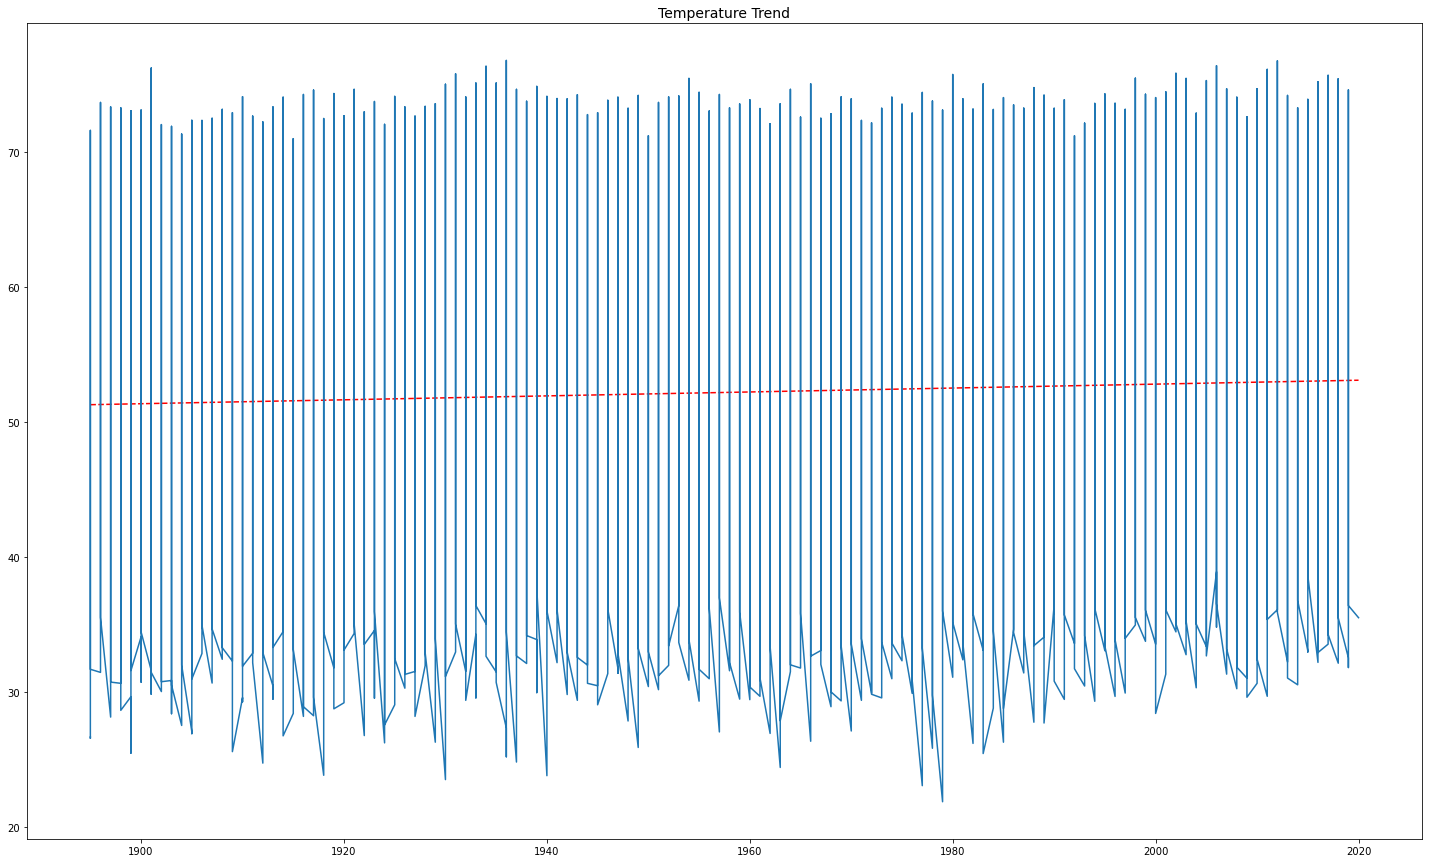

In [216]:
year = atRaw.Year
value = atRaw.Value
anomaly = atRaw.Anomaly

# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(25, 15))

# plot paramaters
z = np.polyfit(year, value, 1)
p = np.poly1d(z)
ax.plot(year,p(year),"r--")
ax.plot(year, value)
ax.set_title('Temperature Trend', fontsize=14);

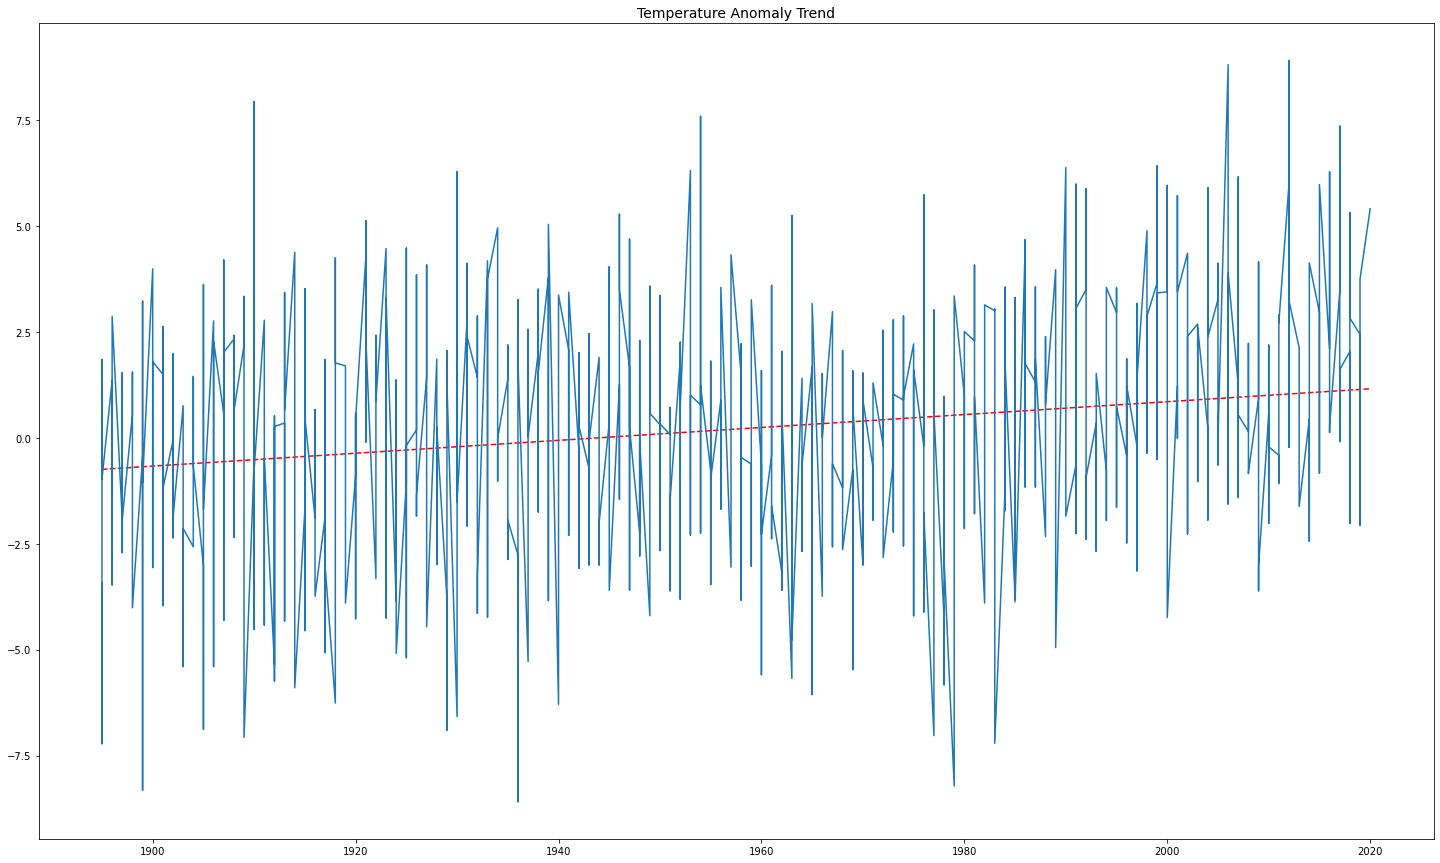

In [218]:
# create a figure and increase the size 
fig, ax = plt.subplots(figsize=(25, 15))

# plot paramaters
z = np.polyfit(year, anomaly, 1)
p = np.poly1d(z)
ax.plot(year,p(year),"r--")
ax.plot(year, anomaly)
ax.set_title('Temperature Anomaly Trend', fontsize=14);